<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab *5*: *Naive Bayes & KNN Classification***

### **Tenggat Waktu: 5 November 2022, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab5_NPM_Nama.ipynb**. Contoh: A_Lab5_2106123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **5 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

# **Pertanyataan Integritas**

In [1]:
# Isi dengan data diri Anda
NAMA = "Ghaitsa Maulidina Shofa"
KELAS = "A"
NPM = "2006597014"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [2006529505, 2006533811]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Ghaitsa Maulidina Shofa dari kelas A dengan NPM 2006597014, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Ghaitsa Maulidina Shofa)


# Naive Bayes

## A. Pengenalan Naive Bayes

Tugas Anda kali ini adalah mengimplementasi Naive Bayes Classifier dan melakukan pengukuran kinerja model. Mari kita sekilas mempelajari tentang Naive Bayes Classifier terlebih dahulu.




 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Bayangkan bahwa Anda ingin membentuk classifier yang memprediksi golongan darah seseorang (A? B? AB? atau O?) berdasarkan sifat karakter seseorang (arogan? perhatian? teliti? cerdas? sabar?). Anda akan membentuk sebuah kuesioner kepribadian dan memberikan kuesioner tersebut ke orang-orang. Kuesioner tersebut dikumpulkan untuk menghasilkan sebuah dataset. Anggaplah
bahwa Kak Lulu mengatakan kepada Anda bahwa dia adalah orang yang perhatian, cerdas, teliti, dan sabar. Bisakah Anda memanfaatkan informasi dari kuesioner yang Anda kumpulkan untuk memprediksi golongan darah Kak Lulu?.

Salah satu cara untuk memprediksi golongan darah Kak Lulu adalah dengan menggunakan teorema Naive Bayes. Jika saya ingin menghitung peluang golongan darah Kak Lulu adalah O karena diketahui Kak Lulu adalah orang yang perhatian, rumus probabilitas yang dapat digunakan adalah Bayes Rule yang ditunjukkan di bawah ini.





$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O)p(O)}{\sum_{O'} p(O')p(\text{perhatian} \mid O')} 
$$

Ketiga nilai tersebut bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita
tidak hanya menghitung P(O | perhatian), tetapi juga menghitung P(A | perhatian) , P(B | perhatian), dan P(AB | perhatian). Setelah kita hitung empat-empatnya, golongan darah yang peluangnya paling besar itulah yang kita
prediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya ingin rumus yang jumlah variabelnya sedikit mungkin. Kalau kita pikirkan lebih lanjut, penyebut dari p(O|perhatian) dibagi oleh p(perhatian). Sama halnya, p(A | perhatian), p(B | perhatian), dan P(AB | perhatian) juga dibagi dengan p(perhatian) seperti yang dapat dilihat pada rumus-rumus di bawah ini.


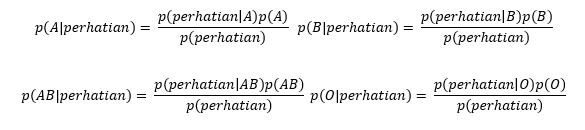

Jika keempat variabel memiliki pembagi yang sama, bukankah ini artinya urutan nilai P(A|perhatian),
P(B|perhatian) , P(AB|perhatian), dan P(O|perhatian) dari yang terbesar sampai yang terkecil tidak akan berubah meskipun penyebutnya (p(perhatian)) dicoret? Sehingga kita tidak perlu untuk menghitung nilai dari p(perhatian).

$$
p(O \mid \text{perhatian}) ∝ p(\text{perhatian}\mid O) p(O)
$$

Perhatikan rumus di atas (rumus ketika pembagian dengan P(perhatian) dihilangkan).
Nilai ini hanya menghitung probabilitas mempunyai golongan darah O bila hanya faktor bahwa Kak Lulu itu perhatian diperhitungkan. Bagaimana faktor seperti cerdas, sabar, teliti, atau sifat
seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


\begin{align}
p(O \mid P,T,S,C) &\propto p(O)p(P,T,S,C\mid O) 
\end{align}


Keterangan : 
*   T: teliti
*   C: cerdas
*   S: Sabar
*   P: perhatian
*   O: golongan darah O






Untungnya, dalam konteks Naive Bayes Classifier, kita dapat mengasumsikan bahwa faktor seperti
teliti, cerdas, dan sebagainya saling conditionally independent atau independensi bersyarat. Artinya, rumus di atas bisa disimplifikasi sebagai berikut:

\begin{align}
p(P,T,S,C \mid O) = p(P\mid O) p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

Dengan demikian, berlaku bahwa


\begin{align}
p(O \mid P,T,S,C) &\propto p(O) p(P,T,S,C \mid O) \\
&= p(O) p(P\mid O)  p(T \mid O) p(S \mid O) p(C \mid O)
\end{align}

## B. Pengenalan Naive Bayes Dalam Sckitlearn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain


| Nama Model | Nama Modul | 
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` | 
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini cocok digunakan untuk data numerik yang mengikuti distribusi gausian dan kontinu. 

- Multinomial Naive Bayes,
Asumsi data yang digunakan memiliki distribusi multinomial sederhana. Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori sehingga model naive bayes ini cocok digunakan pada fitur yang merepresentasikan jumlah maupun laju pertambahan. Contohnya yaitu pada klasifikasi text dimana fitur-fitur yang ada berkaitan dengan frekuensi kata pada dokumen yang ingin diklasifikasikan.

- Complement,
Complement naive bayes mirip seperti multinomial naive bayes. Model ini ada karena model multinomial naive bayes tidak memiliki performa yang baik untuk dataset yang imbalanced dimana distribusi data tidak uniform. Akibatnya model tersebut data dengan mudah overfiting mengikuti data yang jumlahnya jauh lebih banyak. Model complement naive bayes ini cocok digunakan untuk dataset yang imbalanced. 
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli mirip seperti multinomial namun data memiliki bentuk yang diskret dan terdistribusi dalam bentuk binary misalnya pada data gender, binary hot encoding, dll. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Model naive bayes untuk tipe data yang nilainya terdistribusi secara kategorikal. Jika data-data yang dimiliki bersifat kontinu maka harus ditransformasikan dalam bentuk diskret terlebih dahulu untuk menggunakan model ini. Misalnya yaitu data warna mata, ras, golongan darah, dll.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


Selengkapnya dapat dilihat pada dokumentais modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. Hand On Naive Bayes

Dataset didalam example.csv berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting di bidang medis.

Informasi dataset:

`Age` = Umur

`Delivery No` = Status (Tepat waktu, prematur, terlambat)

`Blood of Pressure` = Tekanan Darah (rendah, normal, tinggi)

`Heart Problem` = Memiliki masalah penyakit jantung (apt, inept)

`Cesarian` = Dilakukan operasi caesar (ya, tidak)

Sumber dataset : https://www.kaggle.com/amir75/caesarean-section-classification


### Import Dataset

In [3]:
# import library dan data
import pandas as pd
import numpy as np
caesarian = pd.read_csv("example.csv")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [4]:
# Mencari jumlah nilai unik pada kolom yang bertipe kategorik
for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64 

No. of unique values in column Blood of Pressure:
Normal    40
High      20
Low       20
Name: Blood of Pressure, dtype: int64 

No. of unique values in column Heart Problem:
apt      50
inept    30
Name: Heart Problem, dtype: int64 

No. of unique values in column Caesarian:
Yes    46
No     34
Name: Caesarian, dtype: int64 



### Independent Variable dan Dependent Variable

Pada langkah ini, kita akan menentukan variabel yang menjadi variabel independen dan dependen. Variabel dependen akan menjadi target sedangkan variabel independen akan menjadi fitur. Variabel caesarian menjadi variabel dependen dan variabel lainnya menjadi variabel independen. 

Karena data yang diberikan bertipe kategorik, maka kita perlu melakukan transformasi supaya data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya : <br>
* One hot encoding
* Label encoding (Natural Progression)
* Vector encoding
* etc


Teknik-teknik, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait kelebihan dan kekurangan ketiga teknik tersebut). Pada sesi tutorial ini, kita akan menggunakan teknik one hot encoding. <br><br>
Referensi apa itu one-hot encoding : <br>
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [5]:
# Proses Encoding menggunakan One-Hot encoding

df_dummy = pd.get_dummies(caesarian,drop_first=True)
df_dummy.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,0,1,0,0,0,0
1,26,0,1,0,1,0,1
2,26,1,0,0,1,0,0
3,28,0,1,0,0,0,0
4,22,0,1,0,1,0,1


<b><i> Pemicu : </i></b><br>
Kenapa kita buang fitur pertama dari setiap kolom setelah kita melakukan one-hot encoding? Jika teman-teman baca kembali pada penjelasan naive bayes, naive bayes memegang asumsi yang kuat <b>bahwa</b> setiap fitur independen satu sama lain. Setelah kita melakukan transformasi one hot encoding, akan terjadi korelasi yang sangat tinggi pada dataset kita. Semisal, setelah kita encoding variable gender, terbentuk fitur <b>is_male</b> dan juga <b>is_female</b>. Kedua fitur ini akan saling berkorelasi satu sama lain dengan sangat kuat yang dapat membuat proses training untuk beberapa algoritma menjadi berantakan. N-1 fitur saja sudah cukup, karena sudah dapat menampung semua informasi yang ada.  

In [6]:
# Variabel independen
x = df_dummy.drop(["Caesarian_Yes"], axis = 1)
x.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept
0,22,0,1,0,0,0
1,26,0,1,0,1,0
2,26,1,0,0,1,0
3,28,0,1,0,0,0
4,22,0,1,0,1,0


In [7]:
# Variabel dependen
y = df_dummy["Caesarian_Yes"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian_Yes, dtype: uint8

### Classification
Klasifikasi menggunakan naive bayes terdapat dalam package sklearn. Dalam pengklasifikasian ini dibutuhkan data testing dan data training. Kita akan mengambil 20% dari data yang ada sebagai test.  Berikut adalah kode program untuk menentukan data testing dan data training.

In [8]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y,random_state = 123)

Setelah itu kita akan mengaktifkan/memanggil/membuat fungsi klasifikasi naive bayes dan memasukkan data training pada fungsi klasifikasi gaussian naive bayes.

In [9]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(x_train, y_train)

GaussianNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [10]:
# Prediksi data test
y_pred = modelnb.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)

Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [11]:
# Array data test
np.array(y_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=uint8)

### Classification Report

Setelah model kita training dan kita testing, kita akan mengevaluasi sebagus apa si model yang telah kita bangun tersebut. Ada beberapa nilai yang perlu kita perhatikan disini, yaitu accuracy, f1-score, recall, dan precision. Kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi dengan lebih detail. Melalui report ini, kita dapat menentukan apakah model kita sudah optimal atau belum.

In [12]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [13]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.64      0.78      0.70         9

    accuracy                           0.62        16
   macro avg       0.62      0.60      0.60        16
weighted avg       0.62      0.62      0.61        16



Confusion Matrix



prediction,0,1
actual,,
0,3,4
1,2,7




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.6000000000000001
F1 Micro Average: 0.625
Precision Macro Average: 0.6181818181818182
Precision Micro Average: 0.625
Recall Macro Average: 0.6031746031746031
Recall Micro Average: 0.625



Berdasarkan report diatas, kita dapat melihat bahwa model kita ternyata tidak terlalu baik (<b>OH TIDAK!</b>). Terlihat dari accuracy yang tidak terlalu bagus, begitu juga dengan nilai-nilai yang lainnya. Ada beberapa kemungkinan penyebab, berikut adalah detailnya, <br>
* Dataset yang tidak balance <br>
Perbandingan jumlah tiap class yang di-train tidak seimbang, yang menyebabkan proses training menjadi bias dan terlalu condong pada class dengan jumlah yang lebih banyak <br>
* Pemilihan algoritma naive bayes yang kurang sesuai <br>
Algoritma yang digunakan tidak sesuai dengan sifat data kita, sehingga menghasilkan model yang tidak optimal. Beberapa algoritma hanya cocok untuk distribusi tertentu saja.
* Data Preprocessing yang tidak optimal <br>

# KNN (K-Nearest Neighbors)

## A. Pengenalan KNN

Sesuai dengan namanya (<i>nearest neighbors</i>), algoritma ini mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang lainnya. Contoh, kamu mempunyai dataset yang berisi informasi rumah dengan label rumah mewah dan rumah tidak mewah. KNN akan menyimpan informasi mengenai ukuran yang serupa, seperti kemiripan luas rumah dan juga harga rumah. Ketika data rumah baru masuk, KNN akan mengecek kesamaan informasi data rumah tersebut terhadap data lama yang telah dipelajari KNN. Hasil pengecekan akan dijadikan sebagai kesimpulan rumah baru tersebut masuk ke dalam klasifikasi yang mana.

Apa saja yang perlu kita perhatikan sebelum mengimplementasikan KNN?
* <b>Jumlah K</b> <br>
Jumlah K sangat menentukan performa KNN. K merepresentasikan jumlah data point terdekat, yang akan digunakan untuk menentukan suatu data point masuk ke dalam kategori apa. K yang kecil sangat rentan dengan <i>noise</i> yang dapat membuat model overfitting, sedangkan K yang besar dapat merusak aspek <i>lokalitas</i> yang berujung ke penurunan performa model klasifikasi.<br>


* <b>Rumus Jarak yang digunakan</b> <br>
Rumus jarak yang digunakan untuk menghitung kedekatan data point terhadap data yang lainnya juga sangat menentukan performa dari algoritma KNN. Jika perhitungan jarak yang digunakan kurang sesuai, maka kalkulasi similarity akan tidak tepat dan berujung membuat klasifikasi menjadi tidak sesuai

## B. Pengenakan KNN Pada Scikit-Learn

Referensi : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Pada scikit-learn, ada beberapa parameter yang perlu kita perhatikan, berikut adalah rangkuman singkatnya.

* n_neighbor <br>
n_neighbor merepresentasikan jumlah K yang kita gunakan, dengan default nilai adalah 5 <br>
* algorithm <br>
parameter algorithm merepresentasikan algoritma yang digunakan dalam mencari tetangga terdekat. Algoritma yang tersedia adalah, ball tree, kd tree, brute force, dan auto. Default nilai dari parameter ini adalah auto <br>
* p (int) <br>
parameter ini merepresentasikan parameter yang digunakan untuk metric. Jika menggunakan minkowski, maka p bernilai 1 digunakan untuk manhattan distance dan p bernilai 2 untuk euclidean distance. Default dari parameter ini adalah 2, yaitu euclidean distance <br>
* metric <br>
parameter ini digunakan untuk menentukan rumus jarak yang dipakai. Default dari nilai ini adalah minkowski. <br>

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai k yang optimal adalah dengan <b> cross validation </b> sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data (jika semua numerik mungkin kita bisa memilih untuk menggunakan euclidean atau manhattan, dan jika semua kategorik bisa menggunakan jacard distance). Permasalahan yang selalu ditemukan saat mengimplementasikan KNN adalah, ketika independent variable yang ada terdiri dari data <b>kategorik</b> dan <b>numerik</b>. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma decision tree, random forest, neural network, deep learning, dan lain-lain.

Dokumentasi mengenai terkait rumus jarak apa saja yang dapat digunakan, dapat diakses disini : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

## C. Hand On KNN

Kita akan coba mengimplementasikan KNN untuk mengklasifikasikan species bunga dari dataset Iris yang diambil dari : <br>
https://www.kaggle.com/datasets/uciml/iris?resource=download

Berikut adalah informasi dataset :

`id` = id subject <br>

`SepalLengthCm` = Panjang Sepal dalam cm <br>

`SepalWidthCm` = Lebar Sepal dalam cm <br>

`PetalLengthCm` = Panjang Petal dalam cm <br>

`PetalWidthCm` = Lebar Petal dalam cm <br>

`Species` = Spesies bunga <br>

### Import Dataset

In [14]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", iris.shape[0])
print("Kolom : ", iris.shape[1])

----Informasi Baris dan Kolom----
Baris :  150
Kolom :  6


In [16]:
# bulang kolom id karena tidak berguna
dataIris = iris.drop(columns=["Id"],axis=1)
dataIris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
dataIris.describe(include=object)

,Species
count,150
unique,3
top,Iris-setosa
freq,50


Diatas adalah deskripsi khusus untuk data bertipe kategorik

In [18]:
dataIris.describe(include='number')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Diatas adalah deskripsi data khusus untuk yang bertipe angka

### Preprocessing

In [19]:
# mengecek nilai null
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

In [20]:
cek_null(dataIris)

Tidak ditemukan missing value pada dataset


In [21]:
# mengecek apakah terdapat data duplikat atau tidak
dataIris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [22]:
# jumlah duplikat pada data
print("Jumlah duplikasi data : " + str(dataIris.duplicated().sum()))

Jumlah duplikasi data : 3


Terdapat 3 data duplikat, maka kita perlu drop data tersebut terlebih dahulu.

In [23]:
dataIris_noDuplicate = dataIris.drop_duplicates(inplace = False)
print("Jumlah duplikasi data : " + str(dataIris_noDuplicate.duplicated().sum()))

Jumlah duplikasi data : 0


<AxesSubplot:>

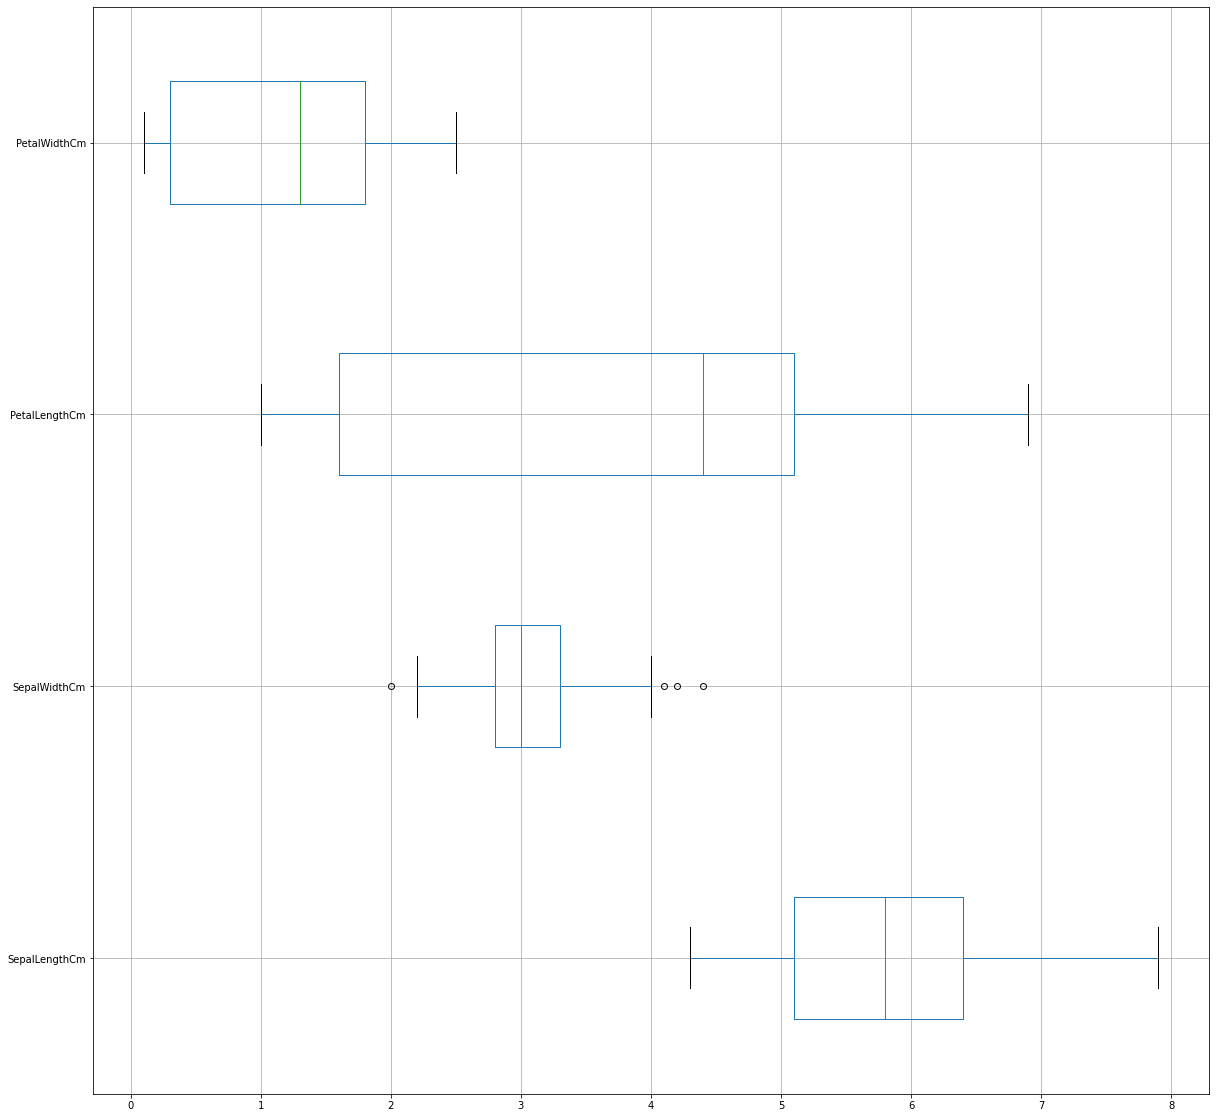

In [24]:
# mengecek keberadaan outlier
dataIris_noDuplicate.boxplot(vert=False,figsize=(20,20))

Pada boxplot diatas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu lagi penanganan terhadap outlier.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
cleanData = dataIris_noDuplicate.copy()

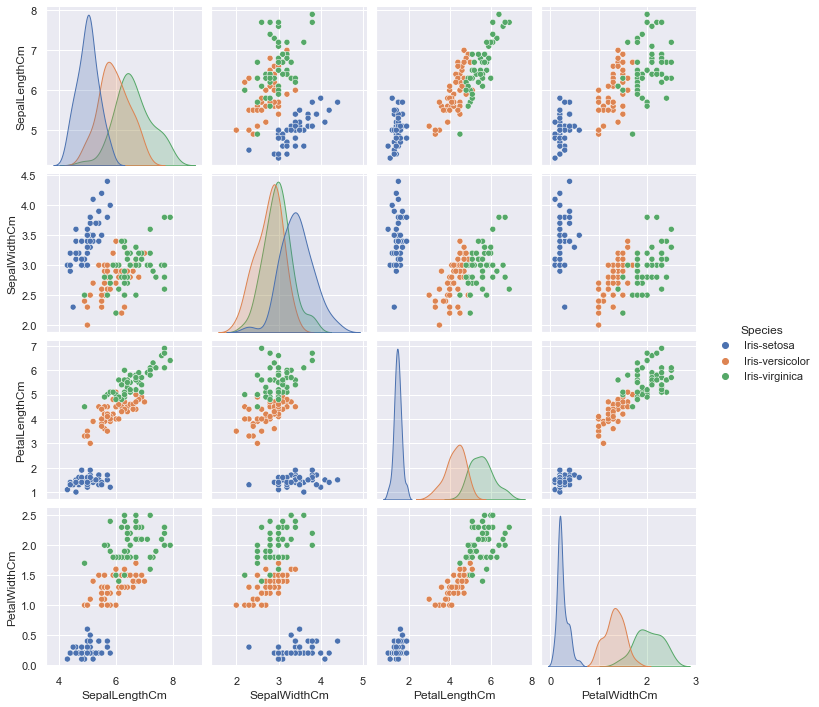

In [27]:
# menampilkan plot data yang sudah bersih
sns.pairplot(cleanData,hue ='Species')

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada ketiga species hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan dependent variable dan independent variables

Karena target prediksi kita disini adalah <b>species</b>, maka variable species akan menjadi variable dependent dan variable yang lainnya akan menjadi variable independent.

Sebelum menentukan independent variables atau features yang akan kita gunakan pada model, kita akan melakukan feature selection terlebih dahulu untuk memilih variable-variable terbaik. Karena data <b>feature</b> kita bersifat numerik atau kontinuos, dan data target kita kategorik, maka kita akan memilih strategi <b> ANOVA </b> atau analysis of variance dalam melakukan feature selection. Berikut adalah contohnya. 

Referensi : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [28]:
# encode target terlebih dahulu menjadi numerik dengan natural progression (label encoder)

# menggunakan label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cleanData["Species"] = le.fit_transform(cleanData["Species"])
cleanData.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
X_raw = cleanData.drop(["Species"],axis=1)
y = cleanData["Species"]

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Kita akan memilih 2 variable terbaik dari independent variable kita untuk dilatih pada model. Berikut adalah contoh code-nya.

In [31]:
selector = SelectKBest(f_classif, k=2) # kita akan memilih 2 variable terbaik dari features kita
X = selector.fit_transform(X_raw, y)

<i> Note </i> : <br>
Perhatikan, pemilihan feature harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [32]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 4
Jumlah feature (setelah dilakukan feature selection ) : 2


In [33]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['PetalLengthCm', 'PetalWidthCm'], dtype=object)

Diatas adalah detail feature apa saja yang kita ambil.

Selanjutnya, kita akan membagi dataset menjadi testing dan training dengan ukuran yang sama pada proses Naive Bayes. Berikut adalah caranya.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

### Standarization

Sebelum melakukan KNN, kita perlu standarisasi nilai independent variables kita. Hal ini <b>cukup penting</b> dilakukan dalam KNN, karena range nilai yang berbeda-beda dapat mengganggu perhitungan jarak ketika algoritma dijalankan. 

Pada tahapan ini, kita akan memilih menggunakan min max scaler saja, berikut adalah caranya.

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train) # training
X_test_scaled = scaler.transform(X_test) # testing

### Melatih Model

In [37]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5) # kita akan menggunakan nilai 5 untuk k terlebih dahulu
KNN.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [38]:
y_pred = KNN.predict(X_test_scaled)
y_pred

array([0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2,
       0, 2, 0, 1, 1, 0, 1, 0])

In [39]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



Confusion Matrix



prediction,0,1,2
actual,,,
0,10,0,0
1,0,10,0
2,0,2,8




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9326599326599326
F1 Micro Average: 0.9333333333333333
Precision Macro Average: 0.9444444444444445
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9333333333333332
Recall Micro Average: 0.9333333333333333



Berdasarkan hasil evaluasi diatas, terlihat bahwa nilai akurasi model kita sudah sangat baik. Selain itu, nilai F1 baik macro dan micro juga terlihat sudah sangat baik. Model jauh dari kemungkinan terjadi false positive dan juga false negative.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [40]:
# Optimalisasi KNN dengan gridsearch CV

# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [1,2,3,4,5]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                     scoring="accuracy",
                    cv=5,
                   verbose = 2
                    )

clfKNN.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
print()
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)
print()

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[C

prediction,0,1,2
actual,,,
0,10,0,0
1,0,10,0
2,0,2,8




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9326599326599326
F1 Micro Average: 0.9333333333333333
Precision Macro Average: 0.9444444444444445
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9333333333333332
Recall Micro Average: 0.9333333333333333




Berdasarkan hasil diatas, kita peroleh bahwa nilai k yang paling optimal adalah 3.

Hyperparameter tuning untuk KNN tidak terbatas hanya untuk nilai k saja ya teman-teman. Kalian bisa menggunakan ini untuk menemukan nilai p terbaik atau metric terbaik yang digunakan pada model. Namun, tentunya kompleksitas tuning akan meningkat dan kalian pasti akan semakin lama menunggunya kelar :D

Berdasarkan hasil diatas, model yang kita peroleh sudah optimal karena nilai akurasi yang hampir mendekati 1. Nilai F1 kita juga sudah diatas 90%, hal ini menandakan bahwa model kita memiliki nilai false positive dan false negative yang rendah.  

# Latihan Soal

Setelah mempelajari apa itu KNN dan Naive bayes beserta penerapannya pada scikit learn, mari kita latihan :D

## A. Pertanyaan Teoritis (Soal Pertama) [15]

### A. Soal Teoritis 1 [5]

Menurut teman-teman, bagaimana cara terbaik untuk memilih model naive bayes yang paling optimal? 

> <b><i>Jawaban</i></b> : <br>
Cara terbaik untuk memilih model naive bayes adalah dengan melihat distribusi dan tipe data independent variablenya.  
    * Gaussian: Cocok untuk data yang diasumsikan berdistribusi normal.  
    * Multinominal: Cocok untuk data yang bersifat diskrit.  
    * Bernoulli: Cocok untuk data yang hanya memiliki 2 value.

> <b><i>Referensi</i></b> : <br>
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/  
https://www.turing.com/kb/an-introduction-to-naive-bayes-algorithm-for-beginners

### B. Soal Teoritis 2 [5]

Kenapa nilai K yang besar pada KNN dapat merusak aspek lokalitas ? Berikan pendapatmu dan sertakan sumber-sumber yang relevan jika teman-teman menggunakannya

> <b><i>Jawaban</i></b> : <br>
Sepengetahuan saya dari yang diajarkan di kelas, K yang besar merusak aspek lokalitas karena hasil clusteringnya menjadi tidak sesuai dengan pengelompokkan yang seharusnya. 

> <b><i>Referensi</i></b> : <br>
Kelas dan slide

### C. Soal Teoritis 3 [5]

Jika teman-teman perhatikan, ketika kita melakukan standarisasi pada data training dan testing pada tahap KNN, method yang digunakan untuk standarisasi training dan testing berbeda ( yang satu menggunakan fit transform, yang satu menggunakan transform saja ). Jelaskan perbedaan kedua method tersebut dan berikan pendapat teman-teman apakah perlu kita melakukan hal tersebut?

> <b><i>Jawaban</i></b> : <br>
fit_transform bertujuan untuk scaling training data dan mempelajari parameter scaling data tersebut. Fit akan menghitung mean dan varians tiap fitur. Mean dan varians yang telah didapat ketika menggunakan fit_transform ini yang akan juga digunakan pada data testing menggunakan transform().
Ketika hanya menggunakan transform biasa, mean dan varians dari data testing yang kita miliki tidak akan dihitung melainkan hanya menggunakan nilai yang didapat dari fit_transform. Hal ini bertujuan untuk menguji kebenaran model kita.


> <b><i>Referensi</i></b> : <br>
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

## B. Latihan Implementasi [85]

Kita akan mencoba membuat model klasifikasi untuk kasus kanker payudara atau <i> breast cancer </i>, berikut adalah dataset nya.

In [41]:
exc = pd.read_csv("breast-cancer.csv")
exc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
print("Jumlah baris : ", exc.shape[0])
print("Jumlah kolom : ", exc.shape[1])

Jumlah baris :  569
Jumlah kolom :  32


In [43]:
# drop id pasien karena tidak dibutuhkan
exc = exc.drop(["id"],axis=1)
exc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
print("-----Berikut adalah daftar kolom/attribut yang bertipe numerik-----")
print()
print(exc.select_dtypes(np.number).columns)
print()
print("Jumlah data yang numerik", len(exc.select_dtypes(np.number).columns))

-----Berikut adalah daftar kolom/attribut yang bertipe numerik-----

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Jumlah data yang numerik 30


In [45]:
print("-----Berikut adalah daftar kolom/attribut yang bertipe kategorik-----")
print()
print(exc.select_dtypes(object).columns)
print()
print("Jumlah data yang kategorik", len(exc.select_dtypes(object).columns))

-----Berikut adalah daftar kolom/attribut yang bertipe kategorik-----

Index(['diagnosis'], dtype='object')

Jumlah data yang kategorik 1


### <b> Deskripsi Soal </b>

Target klasifikasi kita adalah atribut <b>diagnosis</b>. Atribut ini hanya terdiri atas 2 nilai unik, yaitu <b>M</b> dan <b>B</b>. M merupakan kode untuk malignant atau <b>ganas</b>, sedangkan B merupakan kode untuk benign atau <b>Jinak</b>. Secara sederhana, model yang kita buat diharapkan dapat memprediksi dengan baik apakah kanker payudara yang dimiliki pasien jinak atau ganas.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### 1. Preprocessing [15]

Lakukan preprocessing, dengan minimum spesifikasi sebagai berikut : <br>

* `Cek keberadaan missing values` jika ditemukan missing values lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan nilai duplikat` jika ditemukan lakukan penanganan yang tepat sesuai dengan asumsi teman-teman


* `Cek keberadaan outlier` teman-teman bebas memilih penanganan outlier apa yang teman-teman gunakan, bisa dengan membuangnya, mengganti nilainya dengan mean atau median, atau mungkin membiarkannya saja dengan asumsi data normal. Dalam mencari outlier juga, teman-teman bebas menggunakan cara apapun, dengan tetap memberikan asumsi yang logis.


Teman-teman boleh mengembangkan tahapan ini, namun kriteria minimum yang wajib teman-teman lakukan adalah seperti diatas. Silahkan bereksplorasi :D

In [46]:
# Cek Null
cek_null(exc)

Tidak ditemukan missing value pada dataset


In [47]:
# Cek Duplikat
print("Jumlah duplikasi data : " + str(exc.duplicated().sum()))

Jumlah duplikasi data : 0


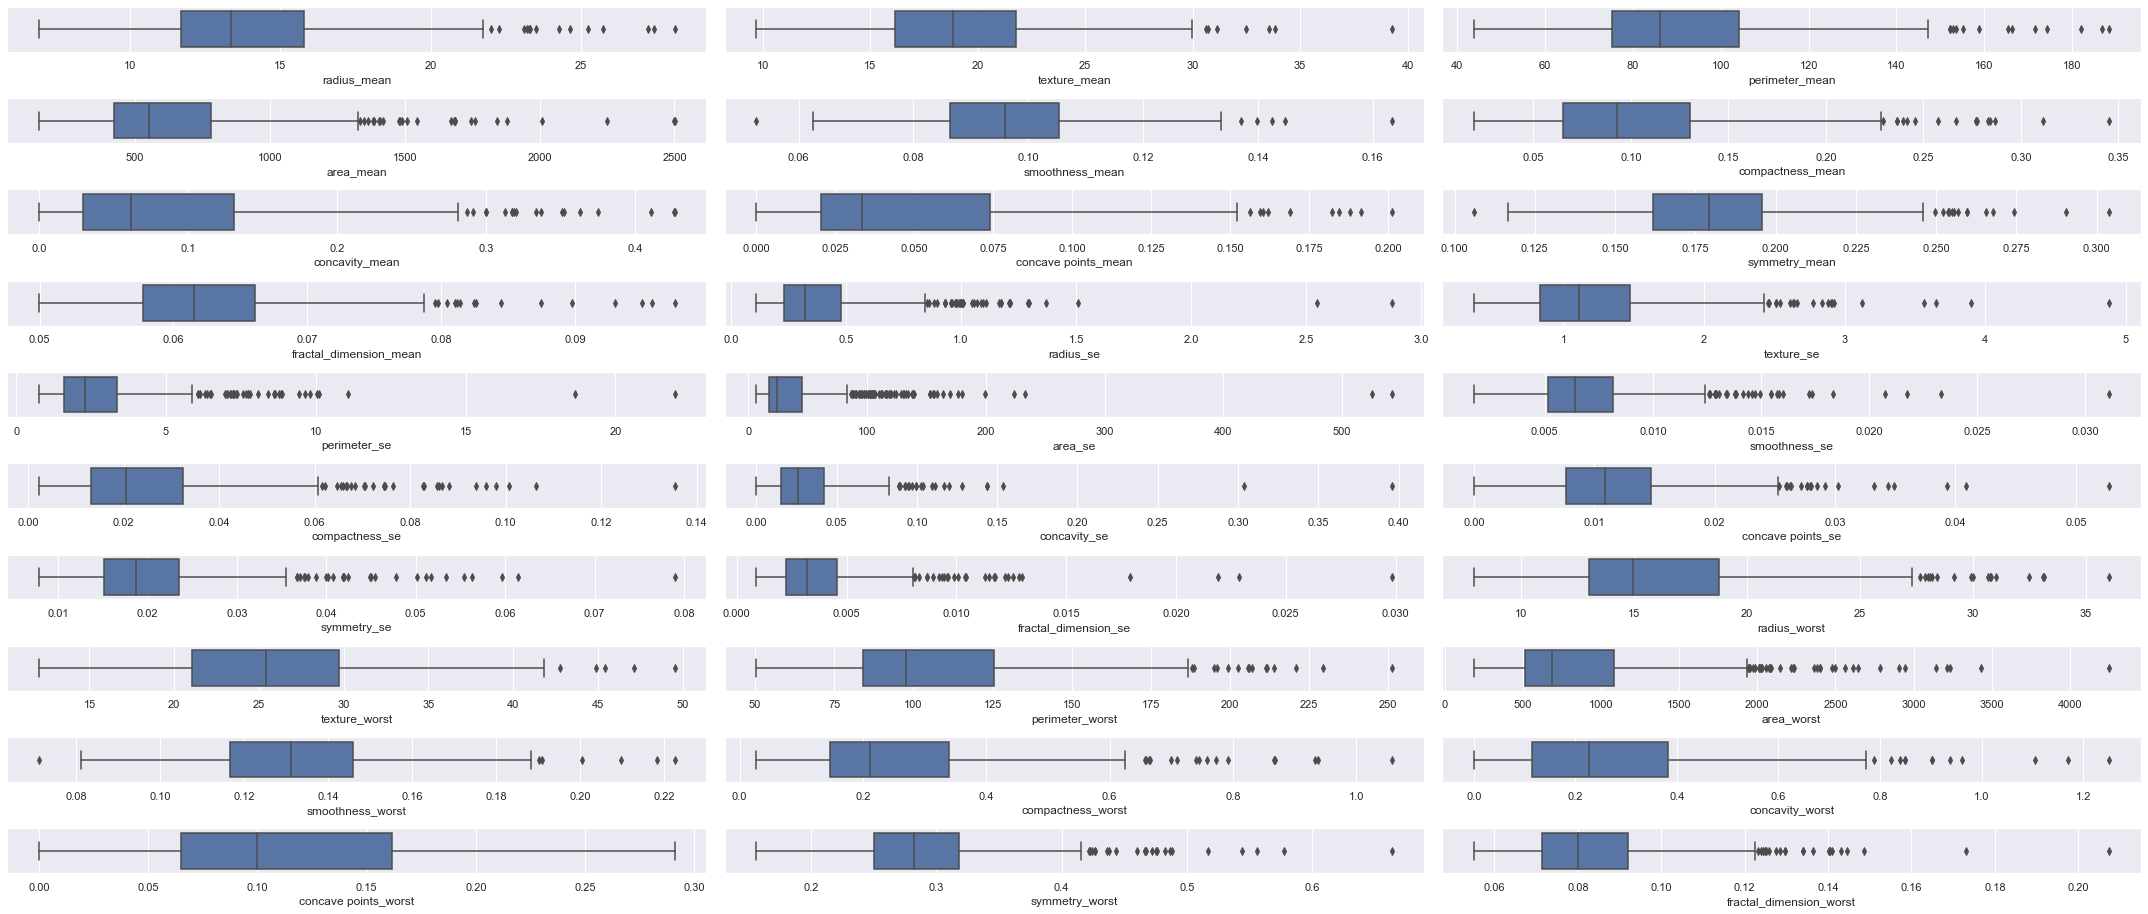

In [48]:
# Cek Outlier
list_tmp = []
for col in exc.select_dtypes(np.number).columns:
    list_tmp.append(col)
    
plt.figure(figsize=(30, 20))
for i in range(len(list_tmp)):
    plt.subplot(16, 3, i+1)
    sns.boxplot(x=exc[list_tmp[i]])
    plt.tight_layout()

In [49]:
def outlier_to_median(df, col):
  print('========== Kolom ' + col + ' ==========')
  # menentukan nilai lower & upper boundary
  Q1 = np.percentile(df[col], 25)
  Q3 = np.percentile(df[col], 75)
  IQR = Q3-Q1
  lower = Q1-(1.5*IQR)
  upper = Q3+(1.5*IQR)
  print('lower boundary =', lower)
  print('upper boundary =', upper)
  # menentukan median
  median = df[col].median()
  print('median =', median)
  # memeriksa data di luar lower & upper boundary
  print('jumlah outlier')
  print('< lower boundary =', df.loc[df[col]<lower, col].size)
  print('> upper boundary =', df.loc[df[col]>upper, col].size)
  # menggantikan nilai outlier menjadi median
  df.loc[df[col]<lower, col] = np.nan
  df.loc[df[col]>upper, col] = np.nan
  df.fillna(median, inplace=True)
  print('outlier berhasil diganti menjadi median!')
  print()

In [50]:
outlier_to_median(exc,'radius_mean')
outlier_to_median(exc,'texture_mean')
outlier_to_median(exc,'perimeter_mean')
outlier_to_median(exc,'area_mean')
outlier_to_median(exc,'smoothness_mean')
outlier_to_median(exc,'compactness_mean')
outlier_to_median(exc,'concavity_mean')
outlier_to_median(exc,'concave points_mean')
outlier_to_median(exc,'symmetry_mean')
outlier_to_median(exc,'fractal_dimension_mean')
outlier_to_median(exc,'radius_se')
outlier_to_median(exc,'texture_se')
outlier_to_median(exc,'perimeter_se')
outlier_to_median(exc,'area_se')
outlier_to_median(exc,'smoothness_se')
outlier_to_median(exc,'compactness_se')
outlier_to_median(exc,'concavity_se')
outlier_to_median(exc,'concave points_se')
outlier_to_median(exc,'symmetry_se')
outlier_to_median(exc,'fractal_dimension_se')
outlier_to_median(exc,'radius_worst')
outlier_to_median(exc,'texture_worst')
outlier_to_median(exc,'perimeter_worst')
outlier_to_median(exc,'area_worst')
outlier_to_median(exc,'smoothness_worst')
outlier_to_median(exc,'compactness_worst')
outlier_to_median(exc,'concavity_worst')
outlier_to_median(exc,'concave points_worst')
outlier_to_median(exc,'symmetry_worst')
outlier_to_median(exc,'fractal_dimension_worst')

========== Kolom radius_mean ==========
lower boundary = 5.579999999999999
upper boundary = 21.9
median = 13.37
jumlah outlier
< lower boundary = 0
> upper boundary = 14
outlier berhasil diganti menjadi median!

========== Kolom texture_mean ==========
lower boundary = 7.725000000000003
upper boundary = 30.244999999999997
median = 18.84
jumlah outlier
< lower boundary = 0
> upper boundary = 7
outlier berhasil diganti menjadi median!

========== Kolom perimeter_mean ==========
lower boundary = 31.775000000000013
upper boundary = 147.49499999999998
median = 86.24
jumlah outlier
< lower boundary = 0
> upper boundary = 13
outlier berhasil diganti menjadi median!

========== Kolom area_mean ==========
lower boundary = -123.30000000000001
upper boundary = 1326.3000000000002
median = 551.1
jumlah outlier
< lower boundary = 0
> upper boundary = 25
outlier berhasil diganti menjadi median!

========== Kolom smoothness_mean ==========
lower boundary = 0.057975
upper boundary = 0.133695
median = 0

Melihat dari data di atas, kolom yang tidak memiliki outlier hanya kolom `concave points_worst`. Ada 6 kolom yang memiliki outlier sedikit sehingga masih bisa kita maklumkan, yaitu `texture_worst`, `smoothness_mean`, `concave points_mean`, `smoothness_worst`, & `texture_mean`

Selain kolom di atas, saya akan mengganti nilai yang outliernya dengan median karena data dari kolom-kolomnya positively skewed. Outlier tidak saya hapus karena terlalu banyak jumlahnya.

### 2. Persiapan Training [15]

Pada tahap ini, teman-teman diminta melakukan persiapan sebelum melakukan training. Berikut adalah hal-hal minimum yang harus teman-teman lakukan :

* `memilih dependent dan juga independent variables` teman-teman diminta untuk memilih dependent dan independent variables yang terbaik menurut penemuan teman-teman. Kalian bisa melakukan feature selection dengan ukuran terbaik menurut teman-teman. Kalin juga bisa menggunakan teknik lain, seperti mengecek korelasi atau melakukan literasi terkait kanker payudara. Bagian terpenting adalah, teman-teman <b> wajib </b> menjelaskan asumsi yang teman-teman ambil. ( <i> Hint </i> : jangan ambil fitur yang terlalu banyak ya teman-teman :D mulai dari kecil-kecil terlebih dahulu, baru jika ingin diimprovisasi perbesar sendiri perlahan dan perlahan)


* `membagi dataset menjadi training dan testing` bagi dataset menjadi training dan testing dengan ukuran 90% training dan 10% testing. Pastikan juga pembagian training dan testing <b>merata</b> berdasarkan target atribut (<i>Hint</i> : perhatikan parameter yang digunakan pada train split test yang digunakan sebelumnya).


* `lakukan standarisasi` teman-teman bebas memilih standarisasi apa yang menurut teman-teman merupakan strategi terbaik. Bagian terpenting adalah, berikan alasan kenapa teman-teman menggunakan strategi tersebut. (<i>Hint</i> : jangan sampai keliru ketika melakukan standarisasi training dan testing).

Jangan lupa untuk melakukan label encoding terlebih dahulu yaa pada atribut target.

#### Memilih dependent dan juga independent variables
Pada dataset ini, target prediksi kita adalah 'diagnosis' yang mana kita ingin mengetahui apakah breast cancer yang diderita termasuk ganas atau jinak. Oleh karena itu, dependent variablesnya adalah 'diagnosis'

Independent variables yang ingin kita gunakan pada model dapat ditentukan dengan melakukan feature selection. Karena data target kita kategorik dan data featuresnya numerik, maka kita gunakan ANOVA untuk feature selection-nya.

In [51]:
# Encode terlebih dahulu dengan label encoder
exc["diagnosis"] = le.fit_transform(exc["diagnosis"])
exc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.09263,0.06154,0.14710,0.2419,...,25.38,17.33,184.60,686.5,0.1622,0.2119,0.7119,0.2654,0.2822,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,686.5,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.09587,0.09263,0.24140,0.10520,0.1792,...,14.91,26.50,98.87,567.7,0.1313,0.2119,0.6869,0.2575,0.2822,0.08004
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Pada variabel independent, terlihat bahwa sebenarnya kolom-kolomnya terbagi menjadi tiga "kategori" yaitu mean, se, dan worst yang masing-masingnya memiliki 10 fitur. Saya ingin mencoba menggunakan setengah fiturnya yaitu k = 5.

In [52]:
# Memisahkan variable dependent dan independent
exc_y = exc['diagnosis'] # variable dependent
exc_x_raw = exc.drop(['diagnosis'],axis=1) # variable independent yang belum diseleksi

# Melakukan feature selection variable independent terhadap variable dependent dengan k=10
selector = SelectKBest(f_classif, k=5)
exc_x = selector.fit_transform(exc_x_raw, exc_y)

# Memeriksa jumlah feature yang tersisa
print("Jumlah feature sebelum feature selection =", exc_x_raw.shape[1])
print("Jumlah feature setelah feature selection =", exc_x.shape[1])
print()

# Memeriksa feature yang dipilih
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

Jumlah feature sebelum feature selection = 30
Jumlah feature setelah feature selection = 5



array(['perimeter_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'concave points_worst'], dtype=object)

#### Membagi dataset menjadi training dan testing

In [53]:
exc_x_train, exc_x_test, exc_y_train, exc_y_test = train_test_split(exc_x, exc_y, test_size = 0.1, stratify=exc_y, random_state = 123)

#### Lakukan standarisasi
Karena ada data yang masih mengandung outlier, standarisasi tidak bisa mengunakan MinMaxScaler maupun StandardScaler. Maka dari itu, saya akan menggunakan RobustScale

In [54]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

exc_x_train_scaled = robust_scaler.fit_transform(X=exc_x_train)
exc_x_test_scaled = robust_scaler.transform(X=exc_x_test)

### 3. Implementasi Naive Bayes [25]

Pada tahapan ini, mahasiswa diminta untuk membangun model naive bayes dengan <b> syarat </b> memilih model naive bayes yang sesuai (berikan alasan yang sesuai). Teman-teman boleh melakukan parameter tuning untuk memaksimalkan model naive bayes. Tampilkan juga hasil evaluasi dan berikan analisis teman-teman terkait hasil evaluasi model. Berikan saran perbaikan yang sesuai menurut pendapat teman-teman jika ternyata model yang diperoleh tidak optimal.

<b><i> Hint </i></b> : <br>
Liat distribusi nilai dari setiap feature yang telah teman-teman pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, teman-teman bisa menentukan model apa yang optimal

Ingat yaa, biasakan menggunakan cell dengan tipe markdown untuk memberikan komentar atau catatan :D

#### Jawab
Pemilihan naive bayes didasari oleh bagaimana distribusi data dan bentuk datanya.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

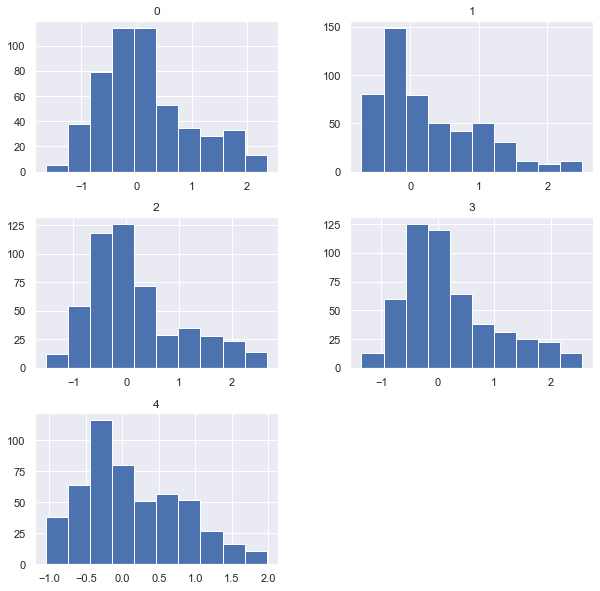

In [55]:
df_exc_x_train_scaled = pd.DataFrame(exc_x_train_scaled)
df_exc_x_train_scaled.hist(figsize = (10,10))

Kita asumsikan data berdistribusi normal, maka kita gunakan Gaussian.

In [56]:
# Implementasi Gaussian
nb_model = GaussianNB()
nb_model.fit(exc_x_train_scaled, exc_y_train.astype(int))

GaussianNB()

In [57]:
# Hasil prediksi data
exc_y_pred_nb = nb_model.predict(exc_x_test_scaled)
exc_y_pred_nb

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [58]:
evaluate_classifier_performance(exc_y_pred_nb.astype(int),exc_y_test.astype(int))

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.87      0.95      0.91        21

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



Confusion Matrix



prediction,0,1
actual,,
0,33,3
1,1,20




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9259740259740259
F1 Micro Average: 0.9298245614035088
Precision Macro Average: 0.920076726342711
Precision Micro Average: 0.9298245614035088
Recall Macro Average: 0.9345238095238095
Recall Micro Average: 0.9298245614035088



Berdasarkan data di atas, hasil prediksinya sudah bagus.

### 4. Implementasi KNN [30]

Setelah mencoba model naive bayes, teman-teman diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN. Pilih nilai K yang terbaik menurut teman-teman dan lakukan analisis berdasarkan temukan teman-teman. Mulai dengan mengambil nilai K secara random terlebih dahulu pada percobaan pertama, lalu kemudian perbaiki dengan parameter tuning. Teman-teman juga boleh mencoba untuk tuning parameter yang lain. Berikan hasil evaluasi model dan berikan analisis teman-teman. Jika model kurang optimal, berikan saran perbaikan yang sesuai.

#### Jawab
Menggunakan k = 5, mengikuti default terlebih dahulu.

In [59]:
# CODE
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(exc_x_train_scaled, exc_y_train.astype(int))

KNeighborsClassifier()

In [60]:
# Dengan model yang sudah dibuat, prediksi data test
exc_y_pred_knn = knn.predict(exc_x_test_scaled)
exc_y_pred_knn

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [61]:
evaluate_classifier_performance(exc_y_pred_knn.astype(int),exc_y_test.astype(int))

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.95      0.95      0.95        21

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



Confusion Matrix



prediction,0,1
actual,,
0,35,1
1,1,20




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.9623015873015872
F1 Micro Average: 0.9649122807017544
Precision Macro Average: 0.9623015873015872
Precision Micro Average: 0.9649122807017544
Recall Macro Average: 0.9623015873015872
Recall Micro Average: 0.9649122807017544



Karena hasil yang didapatkan sudah baik, tidak perlu dilakukan hyperparameter tuning

# ----Selesai----